In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
songName = "Sol Loiro"
artistName = "Armandinho"

In [3]:
url = f"https://www.letras.mus.br/{artistName}/"
r = requests.get(url)

In [4]:
soup = BeautifulSoup(r.text, 'html.parser')

In [5]:
print(soup.prettify())

<!DOCTYPE HTML>
<html dir="ltr" lang="pt-br">
 <head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#">
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src='https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);})(window,document,'script','dataLayer','GTM-KWMSHG8');
  </script>
  <title>
   Armandinho - LETRAS.MUS.BR
  </title>
  <meta content='Veja as letras de Armandinho e ouça "Outra Vida",  "Analua",  "Desenho de Deus",  "Lua Cheia",  "Eu Sou do Mar",  "Casinha" e muito mais músicas!' name="description"/>
  <meta content=" letras de músicas, Armandinho letras, músicas, letra de música, letra, letras de música, legendas, vídeos " name="keywords"/>
  <link href="https://www.letras.mus.br/armandinho/" rel="canonical"/>
  <meta charset="utf-8"/>
  <meta content="app-id=com.studiosol.player.letr

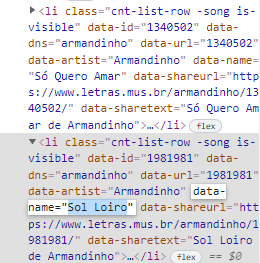

O nome da música está dentro de um elemento `<li>` na propriedade `data-name`, e o link para a página com a letra da música está em `data-shareurl` 

In [6]:
soup.find_all("li")                                      # pega todos os li
soup.find_all("li", attrs={"data-name": songName} )      # pega todos os li com data-name = songName
soup.find_all("li", attrs={"data-name": songName} )[0]   # pega o primeiro li com data-name = songName
soup.find_all("li", attrs={"data-name": songName} )[0]['data-shareurl']   # pega o URL do primeiro li com data-name = songName

'https://www.letras.mus.br/armandinho/1981981/'

In [7]:
# Função que, a partir no nome do artista e nome da música, retorna a URL da música

def songUrl(artistName, songName):
    
    url = f"https://www.letras.mus.br/{artistName}/"
    r = requests.get(url)
    
    soup = BeautifulSoup(r.text, 'html.parser')
    
    url = soup.find_all("li", attrs={"data-name": songName} )[0]['data-shareurl']
    
    return url

In [8]:
# aqui simplemente pega uma lista de nomes e retorna o link pra letra

songs = ['Sol Loiro', 'Ursinho de Dormir', "I Can't Say"]

urls = []

for song in songs:
    urls.append(songUrl(artistName, song))
    
urls

['https://www.letras.mus.br/armandinho/1981981/',
 'https://www.letras.mus.br/armandinho/64421/',
 'https://www.letras.mus.br/armandinho/1193204/']

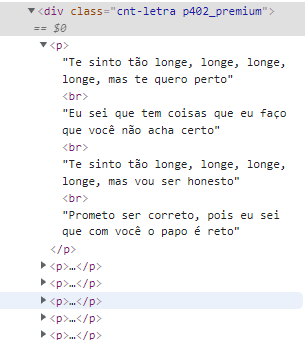

Letra está dentro de `<p>` que estão dentro de uma `<div>` com classe cnt-letra

In [9]:
# Procurando onde está a letra dentro do HTML
url = "https://www.letras.mus.br/armandinho/1981981/"
r = requests.get(url)

soup = BeautifulSoup(r.text, 'html.parser')

In [10]:
soup.find_all("div", attrs={"class": "cnt-letra"} )[0]

<div class="cnt-letra p402_premium"> <p>Te sinto tão longe, longe, longe, longe, mas te quero perto<br>Eu sei que tem coisas que eu faço que você não acha certo<br/>Te sinto tão longe, longe, longe, longe, mas vou ser honesto<br/>Prometo ser correto, pois eu sei que com você o papo é reto</br></p><p>Amor da minha vida, minha conquista<br/>Você é uma ilha, você é uma ilha<br/>Onde as ondas quebram perto, desse mar azul eterno<br/>Teu sol loiro me ilumina, você é minha mina</p><p>Te sinto tão longe, longe, longe, longe, mas te quero perto<br/>Eu sei que tem coisas que eu faço que você não acha certo<br/>Te sinto tão longe, longe, longe, longe, mas vou ser honesto<br/>Prometo ser correto pois eu sei que com você o papo é reto</p><p>Meu sol loiro, positivo amor<br/>Ao teu lado eu posso ser quem sou<br/>Eu sei bem fui eu quem vacilou<br/>Reconheço e agora aqui estou</p><p>Amor da minha vida, minha conquista<br/>Você é uma ilha, você é uma ilha<br/>Onde as ondas quebram perto, desse mar azul

In [11]:
soup.find_all("div", attrs={"class": "cnt-letra"} )[0].get_text(" ")

'  Te sinto tão longe, longe, longe, longe, mas te quero perto Eu sei que tem coisas que eu faço que você não acha certo Te sinto tão longe, longe, longe, longe, mas vou ser honesto Prometo ser correto, pois eu sei que com você o papo é reto Amor da minha vida, minha conquista Você é uma ilha, você é uma ilha Onde as ondas quebram perto, desse mar azul eterno Teu sol loiro me ilumina, você é minha mina Te sinto tão longe, longe, longe, longe, mas te quero perto Eu sei que tem coisas que eu faço que você não acha certo Te sinto tão longe, longe, longe, longe, mas vou ser honesto Prometo ser correto pois eu sei que com você o papo é reto Meu sol loiro, positivo amor Ao teu lado eu posso ser quem sou Eu sei bem fui eu quem vacilou Reconheço e agora aqui estou Amor da minha vida, minha conquista Você é uma ilha, você é uma ilha Onde as ondas quebram perto, desse mar azul eterno Teu sol loiro me ilumina, você é minha mina Te sinto tão longe, longe, longe, longe, mas te quero perto Eu sei qu

In [12]:
letra = soup.find_all("div", attrs={"class": "cnt-letra"} )[0].get_text(" ").strip()

In [13]:
letra

'Te sinto tão longe, longe, longe, longe, mas te quero perto Eu sei que tem coisas que eu faço que você não acha certo Te sinto tão longe, longe, longe, longe, mas vou ser honesto Prometo ser correto, pois eu sei que com você o papo é reto Amor da minha vida, minha conquista Você é uma ilha, você é uma ilha Onde as ondas quebram perto, desse mar azul eterno Teu sol loiro me ilumina, você é minha mina Te sinto tão longe, longe, longe, longe, mas te quero perto Eu sei que tem coisas que eu faço que você não acha certo Te sinto tão longe, longe, longe, longe, mas vou ser honesto Prometo ser correto pois eu sei que com você o papo é reto Meu sol loiro, positivo amor Ao teu lado eu posso ser quem sou Eu sei bem fui eu quem vacilou Reconheço e agora aqui estou Amor da minha vida, minha conquista Você é uma ilha, você é uma ilha Onde as ondas quebram perto, desse mar azul eterno Teu sol loiro me ilumina, você é minha mina Te sinto tão longe, longe, longe, longe, mas te quero perto Eu sei que 

# Daqui pra baixo ta com código bonitinho

In [14]:
import requests
from bs4 import BeautifulSoup

In [15]:
# função para pegar HTML do artista, a partir do nome

def getArtistHTML(artistName):
    
    name = artistName.replace(" ", "-")                   # troca espaço por - no nome
    
    artistUrl = f"https://www.letras.mus.br/{name}/"
    r = requests.get(artistUrl)
    
    artistHTML = BeautifulSoup(r.text, 'html.parser')
    
    return artistHTML

In [16]:
# função para pegar letra a partir do artista e do nome da música

def getLyrics(artistName, songName):
    
    artistHTML = getArtistHTML(artistName)                                                   # primeiro, pegar o html do artista
    
    songUrl = artistHTML.find_all("li", attrs={"data-name": songName} )[0]['data-shareurl']  # pegar a URL da música
    
    r = requests.get(songUrl)                                                                # acessar a URL da música
    songHTML = BeautifulSoup(r.text, 'html.parser')
    
    letra = songHTML.find_all("div", attrs={"class": "cnt-letra"} )[0].get_text(" ").strip() # letra da música
    
    return letra
    

In [17]:
artista = "Ariana Grande"
musica = "thank u, next"
getLyrics(artista, musica)

"Thought I'd end up with Sean But he wasn't a match Wrote some songs about Ricky Now I listen and laugh Even almost got married And for Pete, I'm so thankful Wish I could say thank you to Malcolm 'Cause he was an angel One taught me love One taught me patience And one taught me pain Now, I'm so amazing Say I've loved and I've lost But that's not what I see So, look what I got Look what you taught me And for that, I say Thank you, next (next) Thank you, next (next) Thank you, next I'm so fuckin' grateful for my ex Thank you, next (next) Thank you, next (next) Thank you, next I'm so fuckin' Spend more time with my friends I ain't worried 'bout nothin' Plus, I met someone else We're havin' better discussions I know they say I move on too fast But this one gon' last 'Cause her name is Ari And I'm so good with that (so good with that) She taught me love (love) She taught me patience (patience) How she handles pain (pain) That shit's amazing (yeah, she's amazing) I've loved and I've lost (ye